In [1]:
# import necessary Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #data visualization
import matplotlib.pyplot as plt

<strong>Ingesting and Reading Data </strong>

In [4]:
df= pd.read_csv("exams.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


<strong>EDA - Exploring the exam dataset</strong>

In [4]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82
999,male,group A,some college,standard,completed,65,60,62


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [6]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
df.shape

(1000, 8)

In [10]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


>
<strong>Rename col to snake case</strong>

In [13]:

df=df.rename(columns={"race/ethnicity":"race_ethnicity","parental level of education":"Education","test preparation course":"test_preparation_course","math score":"math_score","reading score":"reading_score","writing score":"writing_score"})
df.head()

,gender,race_ethnicity,Education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


<strong>DATA VISUALIZATION</strong>

In [14]:
def bar_plot(category):

    var = df[category]
    
    varValue = var.value_counts()
    
    plt.figure(figsize =(5,5))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values,rotation=45)
    plt.ylabel("Count")
    plt.title(category.title())
    plt.show()
    print("{}: \n {}".format(category,varValue))

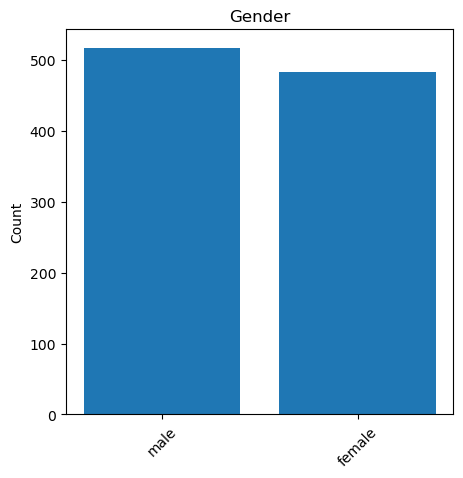

gender: 
 male      517
female    483
Name: gender, dtype: int64


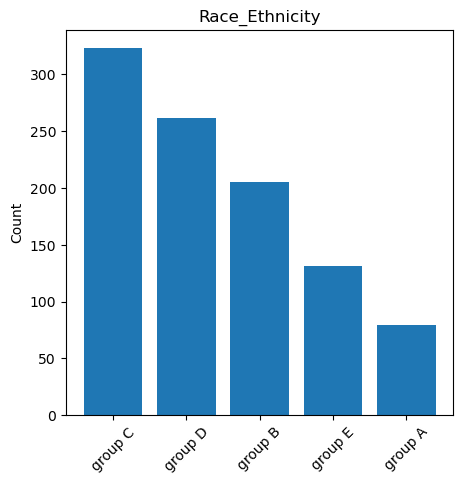

race_ethnicity: 
 group C    323
group D    262
group B    205
group E    131
group A     79
Name: race_ethnicity, dtype: int64


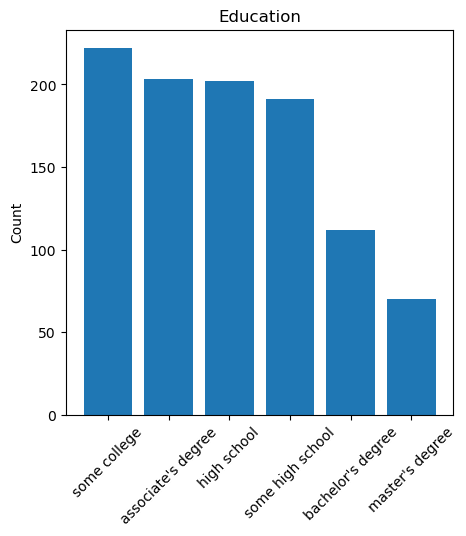

Education: 
 some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: Education, dtype: int64


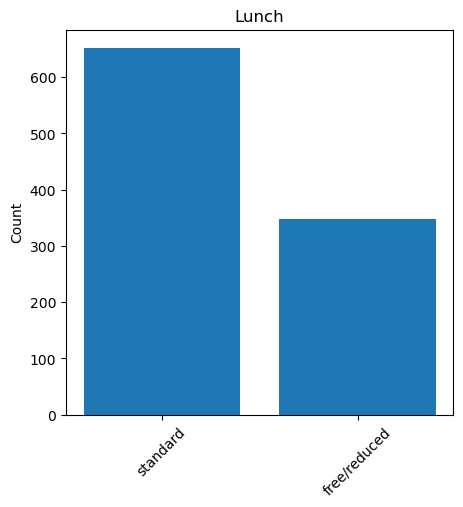

lunch: 
 standard        652
free/reduced    348
Name: lunch, dtype: int64


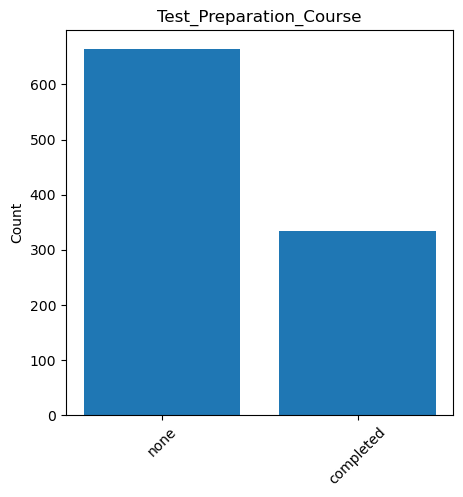

test_preparation_course: 
 none         665
completed    335
Name: test_preparation_course, dtype: int64


In [15]:
categories_to_be_plotted = ["gender","race_ethnicity","Education","lunch","test_preparation_course"]

for category in categories_to_be_plotted:
    
    bar_plot(category)


<strong> The bar plots are created to visualize categorywise distribution of data based on different attributes </strong>

In [52]:
df.race_ethnicity.value_counts()

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race_ethnicity, dtype: int64

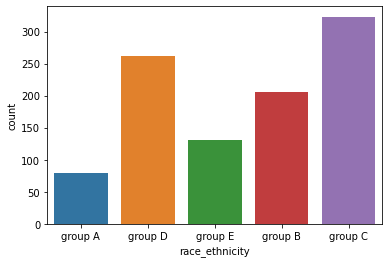

In [53]:
sns.countplot(data=df,x="race_ethnicity")
plt.show()

<strong>This graph indicates that there are more students in group C.
</strong>

In [54]:
df[df.gender=="female"].race_ethnicity.value_counts(normalize=True)

group C    0.318841
group D    0.260870
group B    0.236025
group E    0.107660
group A    0.076605
Name: race_ethnicity, dtype: float64

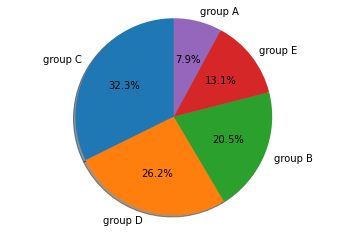

In [55]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df["race_ethnicity"].value_counts().index
sizes = df["race_ethnicity"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<strong>This pie chart shows that there are more people in group C than others.
</strong>

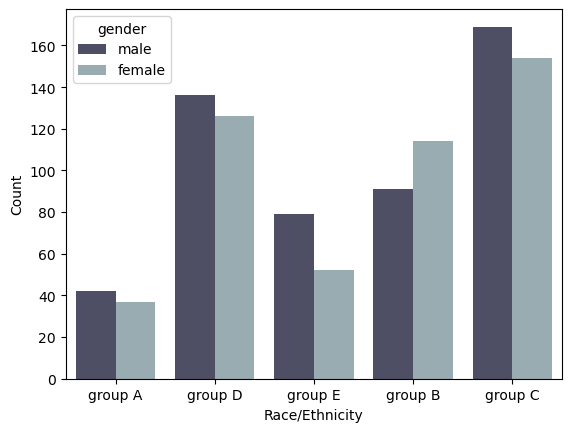

In [20]:
sns.countplot(x=df["race_ethnicity"], hue=df["gender"], palette="bone")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Count")
plt.show()

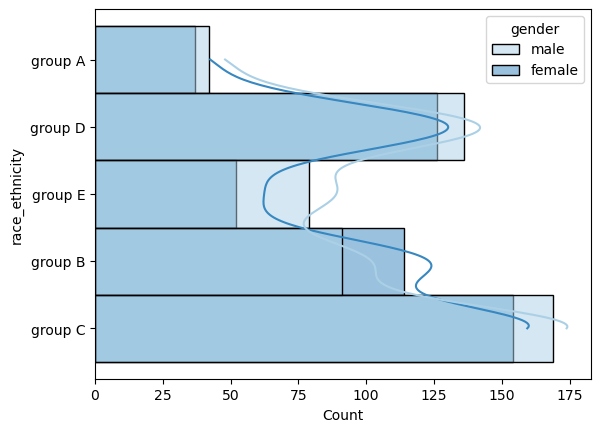

In [22]:
sns.histplot(data=df, y="race_ethnicity", hue= "gender", palette="Blues", kde= True)
plt.show()


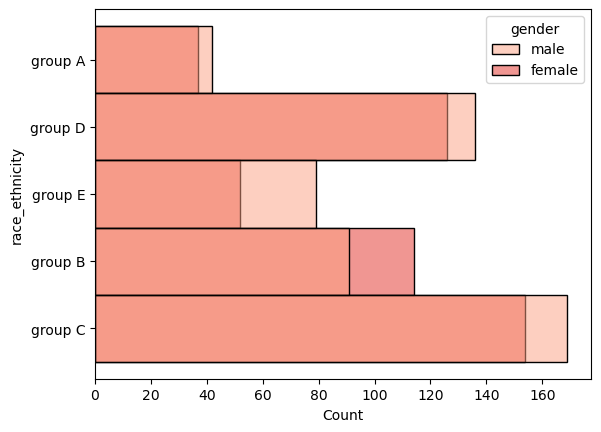

In [25]:
sns.histplot(data=df, y="race_ethnicity", hue= "gender", palette="Reds")
plt.show()

In [59]:
df[df.gender=="female"].race_ethnicity.value_counts()

group C    154
group D    126
group B    114
group E     52
group A     37
Name: race_ethnicity, dtype: int64

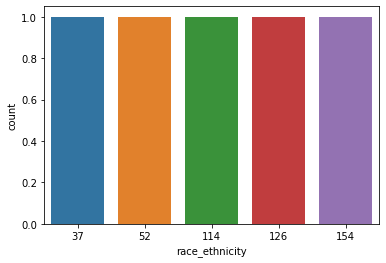

In [60]:
sns.countplot(data=df,x=df[df.gender=="female"].race_ethnicity.value_counts())
plt.show()

In [61]:
df.Education.value_counts()


some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: Education, dtype: int64

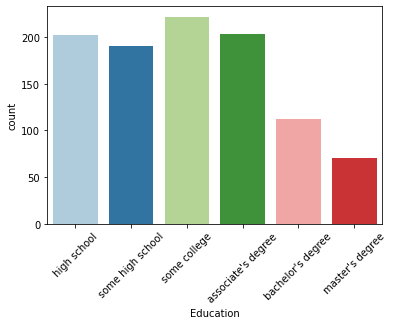

In [62]:
plt.xticks(rotation=45)
sns.countplot(data=df,x="Education",palette="Paired")
plt.show()

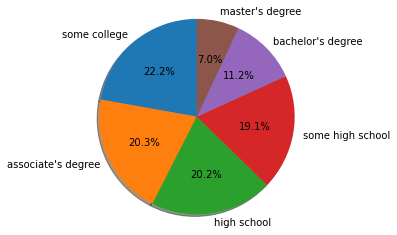

In [63]:
labels = df["Education"].value_counts().index
sizes = df["Education"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [64]:
df.gender.value_counts()


male      517
female    483
Name: gender, dtype: int64

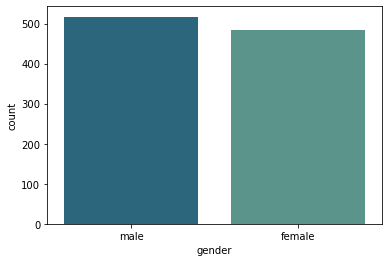

In [65]:
sns.countplot(data=df,x="gender",palette="crest_r")
plt.show()

In [66]:
df.lunch.value_counts()


standard        652
free/reduced    348
Name: lunch, dtype: int64

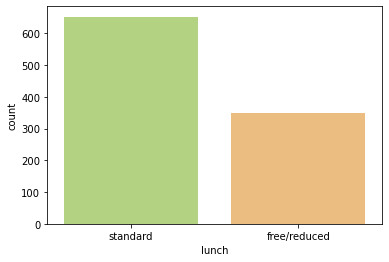

In [67]:
sns.countplot(data=df, x="lunch",palette="RdYlGn_r")
plt.show()

In [68]:
df.test_preparation_course.value_counts()

none         665
completed    335
Name: test_preparation_course, dtype: int64

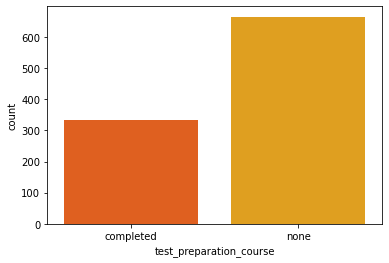

In [69]:
sns.countplot(data=df, x="test_preparation_course",palette="autumn")
plt.show()

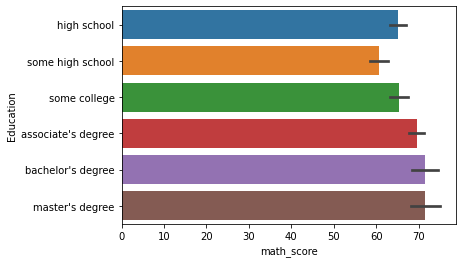

In [70]:
sns.barplot(data=df, x="math_score", y="Education")
plt.show()


In [71]:
df.head()

,gender,race_ethnicity,Education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


### Test Preparation Course - Math Score


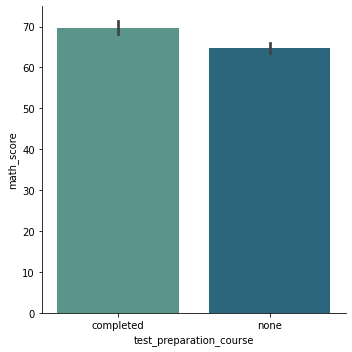

In [72]:
sns.catplot(data=df,x="test_preparation_course",y="math_score",kind="bar",palette="crest")
plt.show()

###  Test Preparation Course - Reading Score

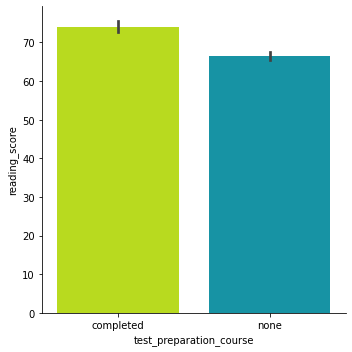

In [73]:
sns.catplot(data=df,x="test_preparation_course",y="reading_score",kind="bar",palette="nipy_spectral_r")
plt.show()

###  Test Preparation Course - Writing Score

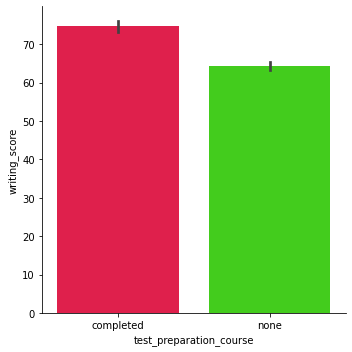

In [74]:
sns.catplot(data=df,x="test_preparation_course",y="writing_score",kind="bar",palette="prism_r")
plt.show()

<strong>From these tables we can conclude that the passing score is approximately 70.</strong>

### Education-math_score 
             &
### Education-reading_score
             &
### Education-writing_score    

In [75]:
y=df[["Education","math_score","reading_score","writing_score"]].groupby(["Education"]).mean().sort_values(by="math_score",ascending = False)
y


,math_score,reading_score,writing_score
Education,,,
master's degree,71.585714,75.428571,75.885714
bachelor's degree,71.491071,74.008929,74.410714
associate's degree,69.536946,70.985222,70.113300
some college,65.297297,68.045045,66.734234
high school,65.207921,67.400990,64.846535
some high school,60.701571,64.408377,62.539267


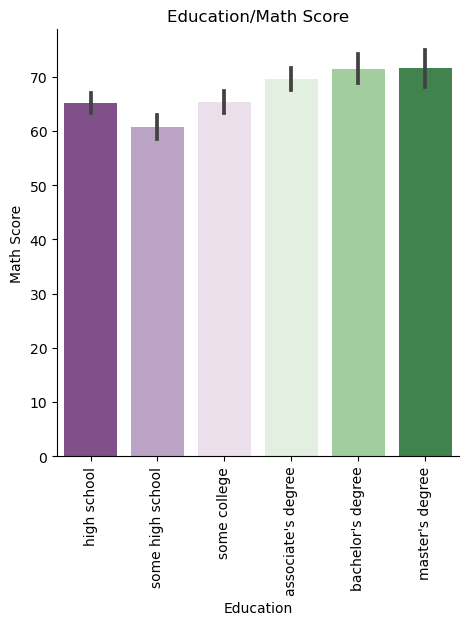

In [29]:
sns.catplot(x="Education",y="math_score",data=df, palette="PRGn",kind="bar")
plt.xticks(rotation=90)
plt.xlabel("Education")
plt.ylabel("Math Score")
plt.title("Education/Math Score")
plt.show()

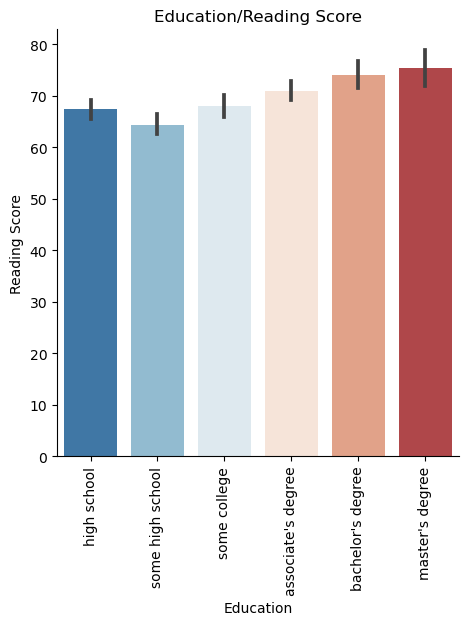

In [18]:
sns.catplot(data=df,x="Education", y="reading_score", kind="bar",palette="RdBu_r")
plt.xticks(rotation=90)
plt.xlabel("Education")
plt.ylabel("Reading Score")
plt.title("Education/Reading Score")
plt.show()

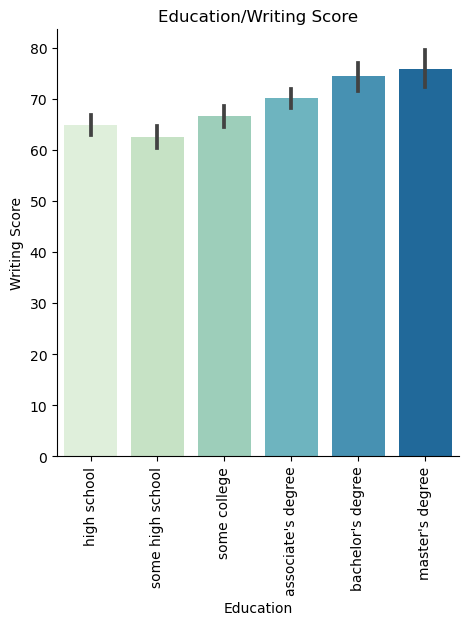

In [28]:
sns.catplot(data=df,x="Education",y="writing_score",kind="bar",palette="GnBu")
plt.xticks(rotation=90)
plt.xlabel("Education")
plt.ylabel("Writing Score")
plt.title("Education/Writing Score")
plt.show()

In [79]:
data1 = df['race_ethnicity'].head()
data2= df['math_score'].head()
conc_data_col = pd.concat([data1,data2],axis =1) # axis = 1 : adds dataframes in column
conc_data_col

,race_ethnicity,math_score
0,group A,67
1,group D,40
2,group E,59
3,group B,77
4,group E,78


### race_ethnicity-math_score   
            &
### race_ethnicity-reading_score 
            &
### race_ethnicity-writing_score

In [80]:
a=df.groupby(["race_ethnicity"])["math_score"].mean()
a

race_ethnicity
group A    65.215190
group B    63.170732
group C    63.130031
group D    69.267176
group E    74.465649
Name: math_score, dtype: float64

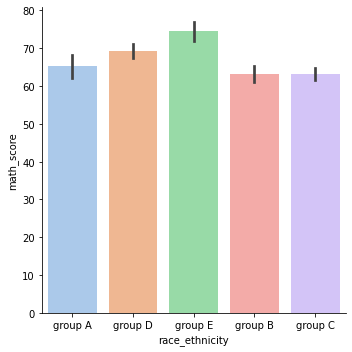

In [81]:
sns.catplot(kind="bar",x="race_ethnicity",y="math_score",data=df,palette="pastel")
plt.show()

In [82]:
df.groupby(["race_ethnicity"])["reading_score"].mean()

race_ethnicity
group A    68.556962
group B    67.102439
group C    66.383901
group D    72.087786
group E    72.526718
Name: reading_score, dtype: float64

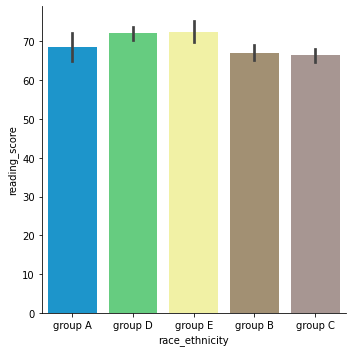

In [83]:
sns.catplot(kind="bar",x="race_ethnicity",y="reading_score",data=df,palette="terrain")
plt.show()

In [84]:
df.groupby(["race_ethnicity"])["writing_score"].mean()

race_ethnicity
group A    66.974684
group B    65.736585
group C    64.523220
group D    72.259542
group E    70.213740
Name: writing_score, dtype: float64

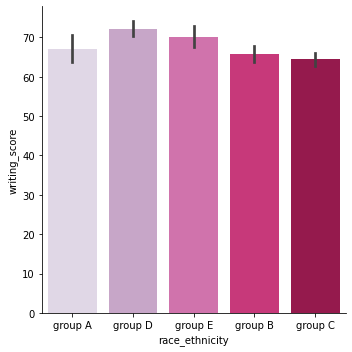

In [85]:
sns.catplot(kind="bar",x="race_ethnicity",y="writing_score",data=df,palette="PuRd")
plt.show()